In [1]:
# cd /bali/freqtrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import talib.abstract as ta
import pandas_ta as pta
from technical import qtpylib


In [68]:
df = pd.read_json('/bali/freqtrade/2022-11-01 11:05:50.581853.json' )
df['profit_ratio'] = (df['profit_ratio'].multiply(100)).round(2).astype(str) + '%'


In [14]:
df = pd.read_json('/bali/freqtrade/2022-10-31 07:46:40.738465.json')
df['profit_ratio'] = (df['profit_ratio'].multiply(100)).round(2).astype(str) + '%'


In [70]:
df['rsi'] = ta.RSI(df)
df['adx'] = ta.ADX(df)
df['volume_pct'] = df['volume'].pct_change()
df['close_pct'] = df['close'].pct_change()
df['close_log'] = np.log(df['close'])
macd = ta.MACD(df)
df['macd'] = macd['macd']
df['macdsignal'] = macd['macdsignal']
df['macdhist'] = macd['macdhist']
df['ao'] = qtpylib.awesome_oscillator(df)
df['uo'] = ta.ULTOSC(df)


features_kmeans_dict_20bar = {'adx':[], 'rsi':[], 'macdhist':[],'ao':[],'uo':[],'close_pct':[],'volume_pct':[] }
features_kmeans_dict_10bar = {'adx':[], 'rsi':[], 'macdhist':[],'ao':[],'uo':[],'close_pct':[],'volume_pct':[]}
features_kmeans_dict_3bar = {'adx':[], 'rsi':[], 'macdhist':[],'ao':[],'uo':[],'close_pct':[],'volume_pct':[]}
features_kmeans_dict_1bar = {'adx':[], 'rsi':[], 'macdhist':[],'ao':[],'uo':[],'close_pct':[],'volume_pct':[], 'close':[], 'volume':[], 'open':[], 'high':[], 'low':[]}

features_kemeans_dict = {'bar_20':features_kmeans_dict_20bar, 'bar_10':features_kmeans_dict_10bar, 'bar_3':features_kmeans_dict_3bar}

for i in features_kmeans_dict_20bar:
    for j in range(20,0,-1):
        features_kmeans_dict_20bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
for i in features_kmeans_dict_10bar:
    for j in range(10,0,-1):
        features_kmeans_dict_10bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
for i in features_kmeans_dict_3bar:
    for j in range(3,0,-1):
        features_kmeans_dict_3bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
for i in features_kmeans_dict_1bar:
    for j in range(1,0,-1):
        features_kmeans_dict_1bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)


/tmp/ipykernel_2297725/3272349391.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
/tmp/ipykernel_2297725/3272349391.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
/tmp/ipykernel_2297725/3272349391.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [71]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_long = df.loc[(df['label'] == 'true_long' ) | (df['label'] == 'false_long')]
numeric_df = df_long
# numeric_df = df_long.apply(lambda x: np.log(x) if ((np.issubdtype(x.dtype, np.number)) and x.name not in ['volume'] ) else x)
# df.dtypes
# # print(np.e)
# # numeric_df = df.copy()
# numeric_df


In [72]:
numeric_df

,date,open,high,low,close,volume,macd,macdsignal,macdhist,enter_long,...,volume_pct_-5,volume_pct_-4,volume_pct_-3,volume_pct_-2,volume_pct_-1,close_-1,volume_-1,open_-1,high_-1,low_-1
231,2019-11-27 11:36:00,144.86,146.06,144.71,145.53,173.010,0.563935,0.462476,0.101459,NaN,...,1.055757,-0.106681,-0.121749,0.271722,-0.004621,145.98,219.700,144.00,145.98,143.87
259,2019-11-27 12:04:00,147.76,147.81,147.27,147.74,136.440,0.482685,0.416126,0.066559,NaN,...,0.229721,-0.432095,1.367740,-0.171081,-0.042708,147.55,153.990,146.90,147.67,146.49
302,2019-11-27 12:47:00,148.06,148.27,147.75,148.27,169.060,0.090443,0.062685,0.027758,NaN,...,0.462517,0.337525,-0.217586,-0.278160,0.040317,148.07,115.600,148.02,148.07,147.94
322,2019-11-27 13:07:00,147.79,148.05,147.71,147.71,254.910,-0.042203,-0.055735,0.013532,NaN,...,-0.243163,0.381849,-0.458535,1.064952,-0.160035,147.77,155.150,147.58,147.77,147.55
343,2019-11-27 13:28:00,148.03,148.15,147.99,148.09,160.530,0.070246,0.065906,0.004339,NaN,...,0.154956,0.487452,0.490798,-0.128013,0.089668,148.16,193.950,148.07,148.16,148.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539232,2022-10-31 05:37:00,1593.51,1594.66,1593.38,1593.38,2893.999,0.578250,0.469476,0.108774,NaN,...,0.105909,-0.219465,0.693926,-0.370954,0.244855,1593.51,1096.773,1593.17,1594.13,1593.17
1539252,2022-10-31 05:57:00,1589.46,1589.46,1588.68,1588.78,389.930,-0.576948,-0.638347,0.061399,NaN,...,-0.398445,0.429935,-0.533529,-0.338475,0.632285,1589.46,920.560,1588.73,1589.54,1588.56
1539255,2022-10-31 06:00:00,1588.56,1589.78,1588.41,1588.72,1984.256,-0.587695,-0.629028,0.041333,NaN,...,-0.338475,0.632285,-0.576421,6.165125,-0.521590,1588.57,1336.628,1587.53,1588.58,1587.49
1539281,2022-10-31 06:26:00,1583.01,1583.02,1581.37,1582.08,1369.188,-1.471167,-1.589811,0.118644,NaN,...,-0.608199,-0.104883,-0.475782,0.361537,0.496491,1583.02,1591.865,1582.81,1583.63,1582.46


/tmp/ipykernel_2297725/3392854626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts.replace(np.inf, 0, inplace=True)
/tmp/ipykernel_2297725/3392854626.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts.replace(-np.inf, 0, inplace=True)
/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label

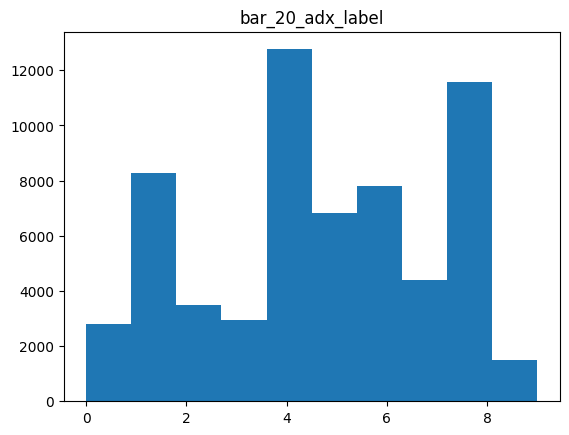

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


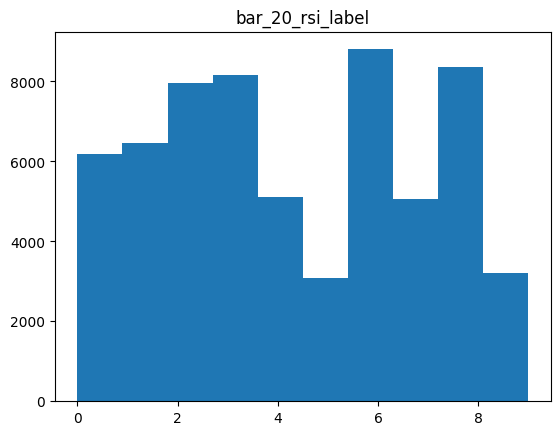

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


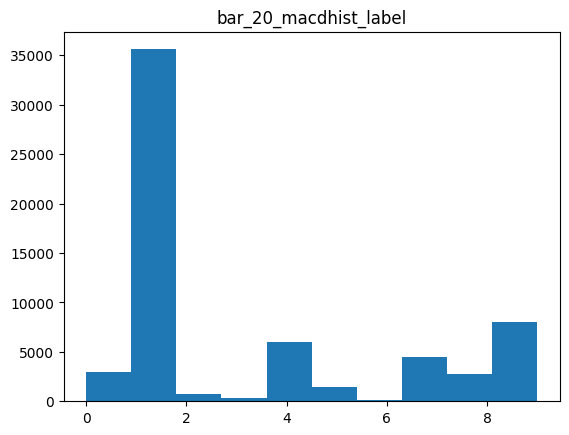

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


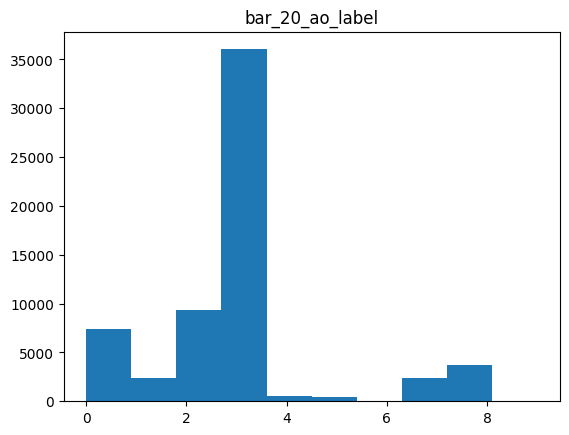

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


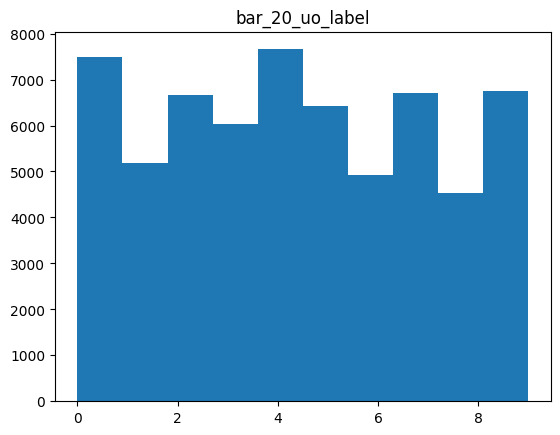

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


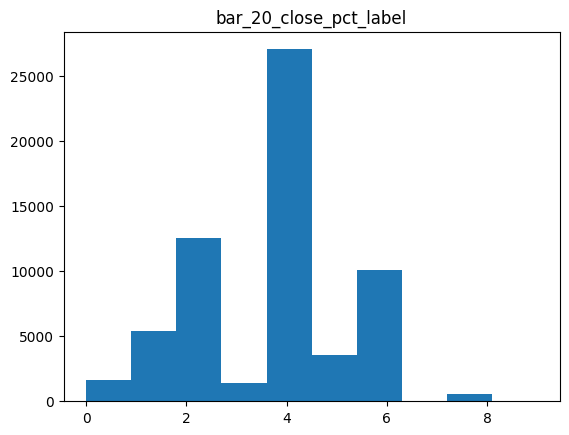

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


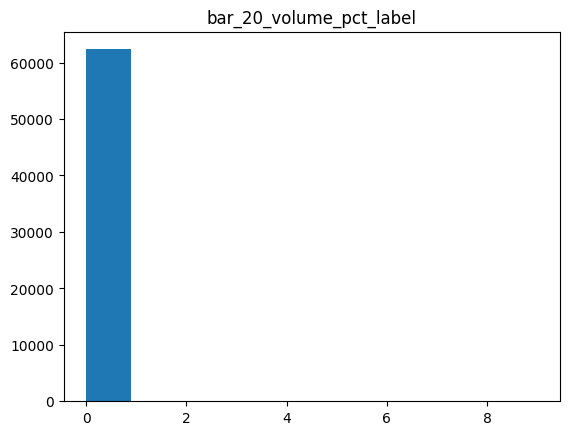

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


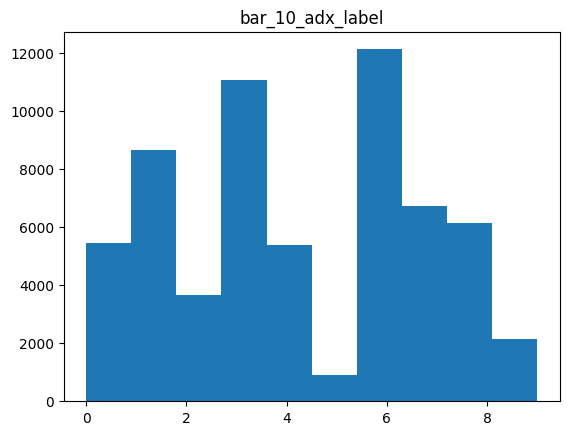

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


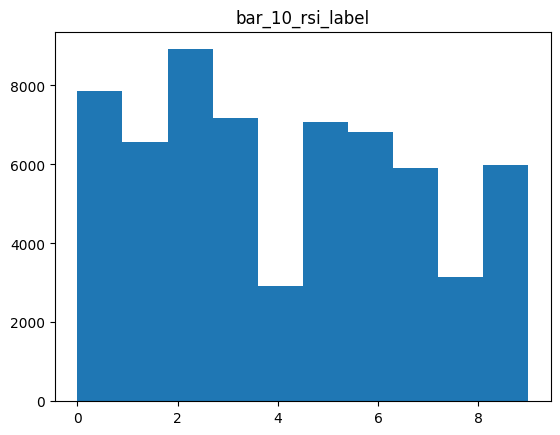

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


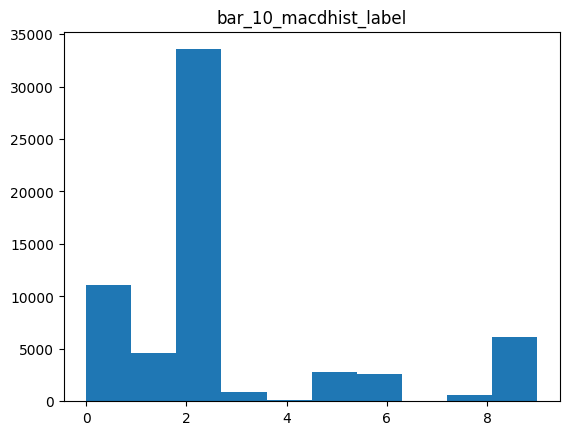

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


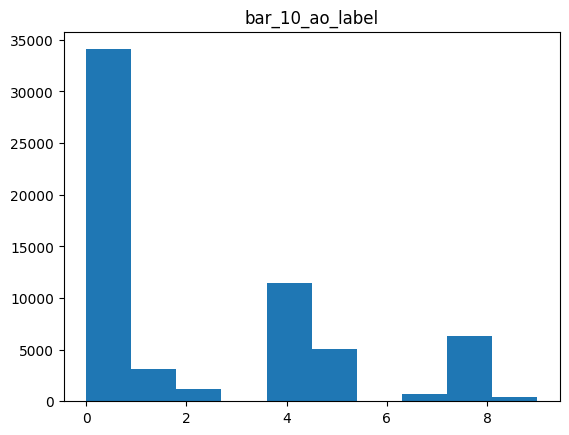

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


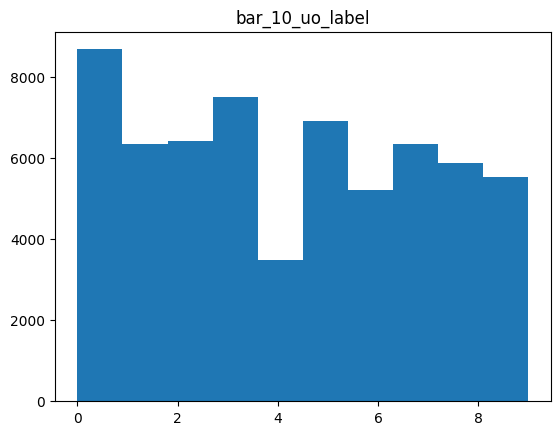

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


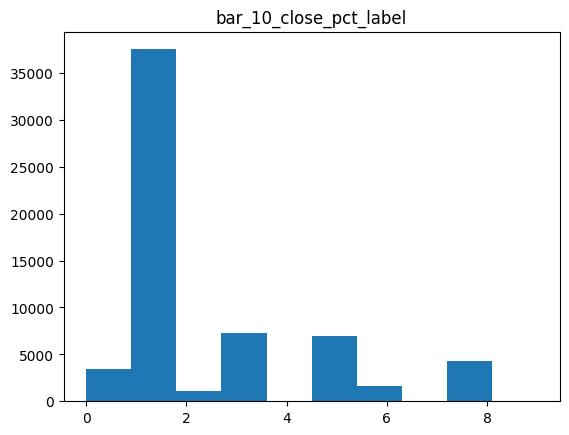

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


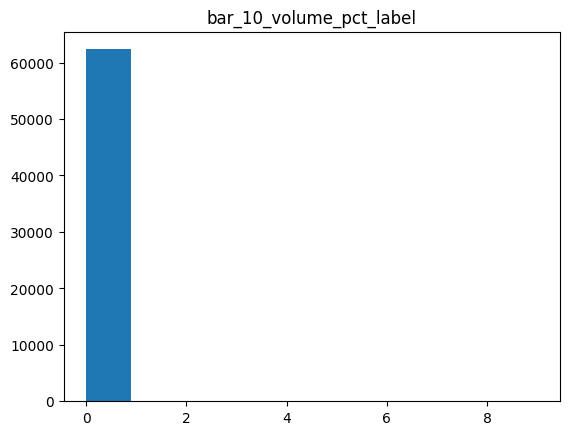

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


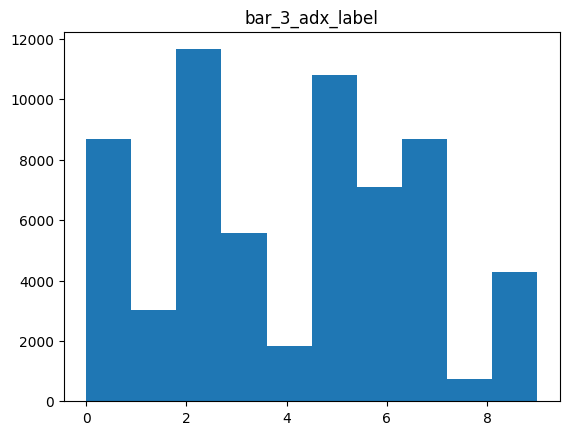

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


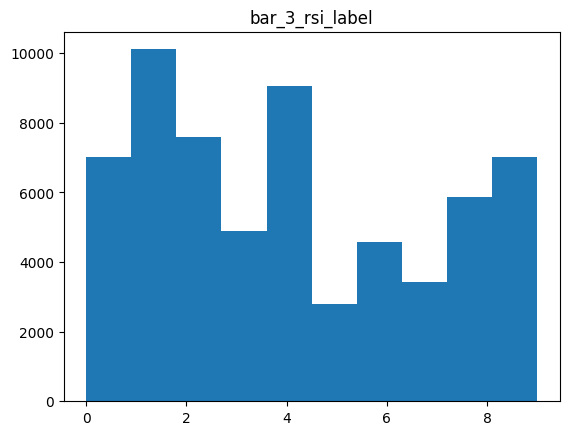

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


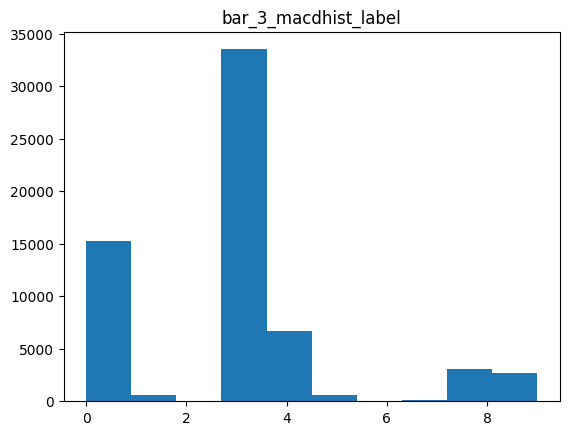

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


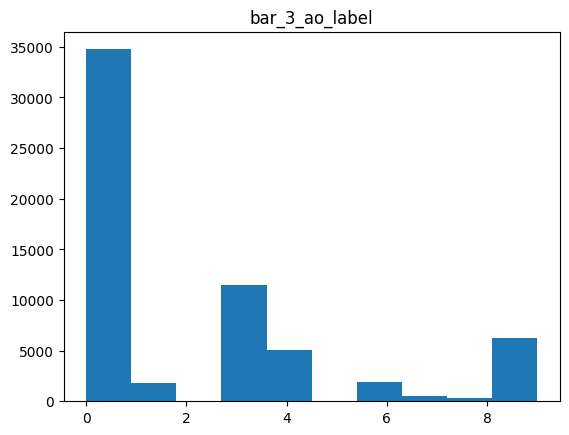

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


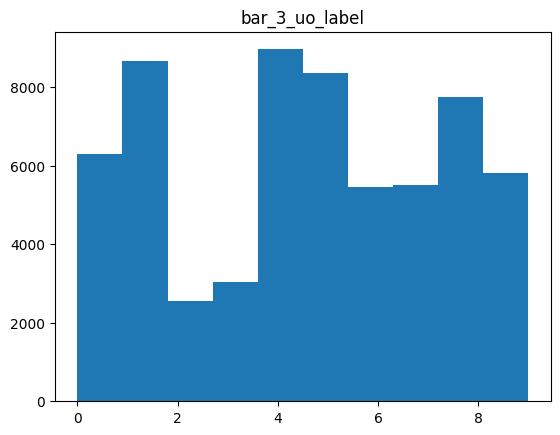

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


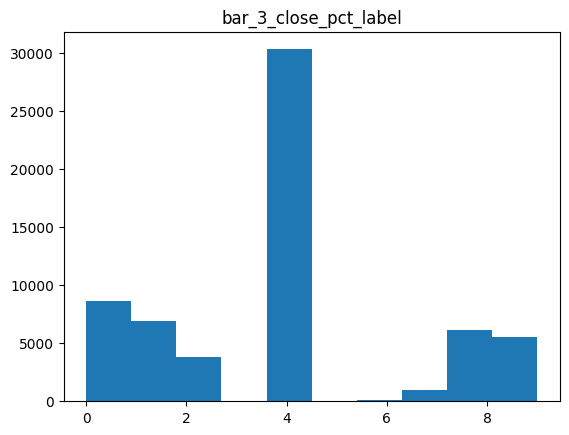

/tmp/ipykernel_2297725/3392854626.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_


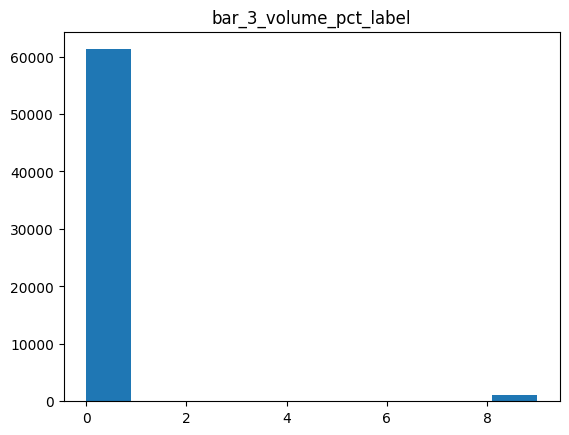

In [73]:
""" test DTW code  """
from tslearn.clustering import TimeSeriesKMeans
import random
k_means_label = []
# df_kmeans = numeric_df.dropna()
df_kmeans = numeric_df.fillna(0)
df_kmeans_ts = df_kmeans[100:]
df_kmeans_ts.reset_index(drop=True, inplace=True)
df_kmeans_ts.replace(np.inf, 0, inplace=True)
df_kmeans_ts.replace(-np.inf, 0, inplace=True)
for i,j in features_kemeans_dict.items():
    for k,v in j.items():
        k_name = f'{i}_{k}'
        k_clusters = 10
        kmeans = TimeSeriesKMeans(n_clusters=k_clusters, random_state=42)
        y_pred = kmeans.fit_predict(df_kmeans_ts[v])
        # kmeans.labels_
        # kmeans.cluster_centers_.shape
        df_kmeans_ts[f'{k_name}_label'] = kmeans.labels_
        k_means_label.append(f'{k_name}_label')
        plt.hist(kmeans.labels_, bins=10)
        plt.title(f'{k_name}_label')
        plt.show()

In [54]:
df_kmeans_ts[k_means_label] 

,bar_20_adx_label,bar_20_rsi_label,bar_20_macdhist_label,bar_20_ao_label,bar_20_uo_label,bar_20_close_pct_label,bar_20_volume_pct_label,bar_10_adx_label,bar_10_rsi_label,bar_10_macdhist_label,...,bar_10_uo_label,bar_10_close_pct_label,bar_10_volume_pct_label,bar_3_adx_label,bar_3_rsi_label,bar_3_macdhist_label,bar_3_ao_label,bar_3_uo_label,bar_3_close_pct_label,bar_3_volume_pct_label
0,5,1,3,8,8,3,2,9,1,2,...,7,5,4,8,6,3,8,6,8,0
1,8,7,3,8,3,7,2,3,7,2,...,5,1,4,2,6,3,8,0,2,6
2,8,5,3,8,3,7,2,3,8,2,...,0,1,4,2,4,3,8,9,8,0
3,0,9,3,8,3,7,2,0,4,2,...,9,2,4,0,0,3,8,6,0,0
4,0,9,3,8,7,7,2,0,7,2,...,5,1,4,0,0,3,8,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20701,2,1,9,0,0,7,2,5,2,0,...,3,2,4,7,2,0,0,3,0,0
20702,8,7,0,8,7,7,2,7,7,2,...,0,2,4,5,8,3,8,9,8,0
20703,7,4,0,0,8,7,4,5,2,0,...,2,6,4,9,4,0,0,6,8,0
20704,3,2,3,7,3,7,7,5,0,2,...,7,5,1,7,9,0,8,0,8,2


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer


In [ ]:
df_kmeans_ts.to_json('df_kmeans_ts.json')
cd /bali/freqtrade
df_kmeans_ts = pd.read_json('df_kmeans_ts.json')

In [74]:
df_kmeans_ts[[b for i in features_kmeans_dict_1bar.values() for b in i ] + k_means_label]

,adx_-1,rsi_-1,macdhist_-1,ao_-1,uo_-1,close_pct_-1,volume_pct_-1,close_-1,volume_-1,open_-1,...,bar_10_uo_label,bar_10_close_pct_label,bar_10_volume_pct_label,bar_3_adx_label,bar_3_rsi_label,bar_3_macdhist_label,bar_3_ao_label,bar_3_uo_label,bar_3_close_pct_label,bar_3_volume_pct_label
0,41.747400,39.250608,0.001805,-0.203529,64.829788,0.000132,-0.645256,151.77,31.370,151.75,...,4,1,0,9,7,3,0,2,4,0
1,21.186410,55.291170,0.001138,0.070265,56.672903,0.000000,-0.281827,152.01,21.380,152.01,...,7,1,0,5,2,3,0,0,4,0
2,41.963524,34.225117,0.002406,-0.264853,49.639893,0.000000,-0.456697,151.33,48.430,151.35,...,4,1,0,1,7,3,0,4,4,0
3,43.214000,38.507851,0.006486,-0.311794,47.876253,0.000198,-0.699642,151.17,30.210,151.14,...,8,1,0,1,7,3,0,1,4,0
4,37.842317,52.056055,0.003587,-0.102000,79.064484,0.000198,-0.810266,151.51,22.030,151.51,...,4,1,0,9,4,3,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62354,16.176244,60.374263,0.076503,0.547706,52.836462,0.000213,0.244855,1593.51,1096.773,1593.17,...,0,1,0,2,0,3,0,4,4,0
62355,19.413176,48.141647,0.059659,-1.485765,64.956554,0.000466,0.632285,1589.46,920.560,1588.73,...,5,1,0,5,1,3,0,6,4,0
62356,20.200875,44.881550,0.010626,-1.579647,46.258098,0.000655,-0.521590,1588.57,1336.628,1587.53,...,0,1,0,5,9,3,0,1,4,0
62357,37.836755,43.110911,0.095930,-3.787735,46.365489,0.000126,0.496491,1583.02,1591.865,1582.81,...,0,1,0,9,9,0,3,1,4,0


In [59]:
[b for i in features_kmeans_dict_1bar.values() for b in i ]

['adx_-1',
 'rsi_-1',
 'macdhist_-1',
 'ao_-1',
 'uo_-1',
 'close_pct_-1',
 'volume_pct_-1',
 'close_-1',
 'volume_-1',
 'open_-1',
 'high_-1',
 'low_-1']

In [75]:
X = df_kmeans_ts[[b for i in features_kmeans_dict_1bar.values() for b in i ] + k_means_label]
y = df_kmeans_ts[['label']]
# X_pipeline = make_pipeline(StandardScaler())
# y_pipeline = make_pipeline(StandardScaler())
# X = X_pipeline.fit_transform(X)
# y = y_pipeline.fit_transform(y.values.reshape(-1, 1))
X.replace(np.inf, 0, inplace=True)
num_attribs = [b for i in features_kmeans_dict_1bar.values() for b in i ] 
cat_attribs = k_means_label
num_pipeline = make_pipeline(
    StandardScaler())
cat_pipeline = make_pipeline(
    OrdinalEncoder())
# X_t = cat_pipeline.fit_transform(X[cat_attribs])
preprocessing = ColumnTransformer([
    ('num', num_pipeline ,num_attribs),
    # ('cat', cat_pipeline,make_column_selector(dtype_include=object))
    ('cat2', cat_pipeline,cat_attribs)])
# y_pipiline = make_pipeline(OneHotEncoder())
X_t = preprocessing.fit_transform(X)
y_t = cat_pipeline.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_t, y_t,test_size=0.2, random_state=42,shuffle=False)
# X_t = preprocessing.fit_transform(X_train).toarray()
# y_t = y_train.values.reshape(-1, 1)
# y_t = y_pipiline.fit_transform(y_train.values.reshape(-1, 1)).toarray()

/tmp/ipykernel_2297725/4242892175.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(np.inf, 0, inplace=True)


In [76]:
print(X_train.shape, y_train.shape)
y_train[1]

(49887, 33) (49887, 1)


array([0.])

In [77]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers

In [61]:
X

,adx_-1,rsi_-1,macdhist_-1,ao_-1,uo_-1,close_pct_-1,volume_pct_-1,close_-1,volume_-1,open_-1,...,bar_10_uo_label,bar_10_close_pct_label,bar_10_volume_pct_label,bar_3_adx_label,bar_3_rsi_label,bar_3_macdhist_label,bar_3_ao_label,bar_3_uo_label,bar_3_close_pct_label,bar_3_volume_pct_label
0,25.052156,47.420702,0.000264,-0.431353,49.261099,0.001011,0.142228,148.59,2046.023,148.41,...,7,5,4,8,6,3,8,6,8,0
1,19.561209,47.989245,0.007110,-0.192324,50.763090,-0.000269,0.813794,148.49,2557.150,148.57,...,5,1,4,2,6,3,8,0,2,6
2,17.554805,48.347890,0.001922,-0.203941,49.330482,0.001012,-0.281456,148.42,1253.015,148.31,...,0,1,4,2,4,3,8,9,8,0
3,11.807935,54.904460,0.016257,-0.085000,52.446660,0.001617,-0.368959,148.62,1380.069,148.38,...,9,2,4,0,0,3,8,6,0,0
4,11.177201,50.565853,0.001342,-0.047559,58.803228,-0.000135,-0.623294,148.46,663.105,148.47,...,5,1,4,0,0,3,8,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20701,33.256377,46.594341,0.019548,-9.634529,63.520675,0.002653,-0.007171,1583.75,10210.140,1579.56,...,3,2,4,7,2,0,0,3,0,0
20702,14.583323,45.981767,0.027536,-2.987059,43.144228,-0.000076,0.277472,1584.20,7612.623,1584.32,...,0,2,4,5,8,3,8,9,8,0
20703,38.028900,45.185786,0.234734,-10.131235,47.991980,0.001185,0.597446,1570.85,16978.342,1569.00,...,2,6,4,9,4,0,0,6,8,0
20704,36.018803,69.835518,0.151042,3.078676,49.035950,0.001766,6.825015,1588.49,29735.598,1585.69,...,7,5,1,7,9,0,8,0,8,2


In [78]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',  'Precision'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2176      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/500
1248/1248 [==============================] - 3s 2ms/step - loss: 0.6112 - accuracy: 0.6969 - precision: 0.0000e+00 - val_loss: 0.6176 - val_accuracy: 0.6920 - val_precision: 0.0000e+00
Epoch 2/500
1248/1248 [==============================] - 2s 1ms/step - loss: 0.6075 - accuracy: 0.6970 - precision: 0.0000e+00 - val_loss: 0.6218 - val_accuracy: 0.6920 - val_precision: 0.0000e+00
Epoch 3/500
1248/1248 [==============================] - 2s 2ms/step - loss: 0.6068 - accuracy: 0.6970 - precision: 0.0000e+00 - val_loss: 0.6167 - val_accuracy: 0.6920 - val_precision: 0.0000e+00
Epoch 4/500
1248/1248 [==============================] - 2s 1ms/step - loss: 0.6057 - accuracy: 0.6970 - precision: 0.0000e+00 - val_loss: 0.6168 - val_accuracy: 0.6920 - val_precision: 0.0000e+00
Epoch 5/500
1248/1248 [==============================] - 2s 2ms/step - loss: 0.6047 - accuracy: 0.6969 - precision: 0.2857 - val_loss: 0.6162 - val_accuracy: 0.6920 - val_precision: 0.0000e+00
Epoch 6/500
1248/12

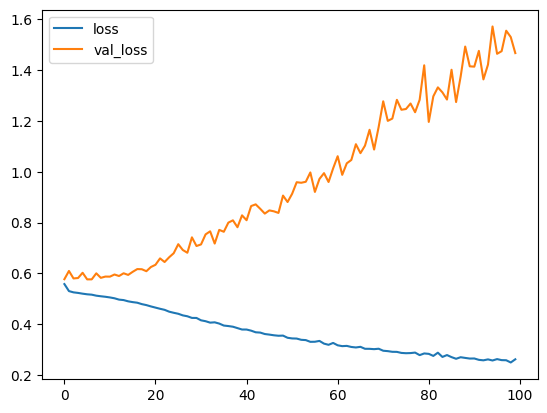

In [48]:
history = model.history.history
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [67]:
print('git ')

git 
